In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.2/38.6 MB 1.9 MB/s eta 0:00:20
    --------------------------------------- 0.6/38.6 MB 5.1 MB/s eta 0:00:08
    --------------------------------------- 0.9/38.6 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.6 MB 4.9 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.6 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.6 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.4/38.6 MB 3.9 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.6 MB 3.9 MB/s eta 0:00:10
   - -----------

In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
DIRECTORY = r'C:\Users\BOBBY\Documents\AICTE Intern\dogsvscats'

CATEGORIES = ['cats', 'dogs']

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [8]:
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
from keras.preprocessing.image import ImageDataGenerator

DIRECTORY = r'C:\Users\BOBBY\Documents\AICTE Intern\dogsvscats'
CATEGORIES = ['cats', 'dogs']

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Data Augmentation for Test Set
test_datagen = ImageDataGenerator(rescale=1./255)

# Training Set
train_set = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES)

# Validation Set
test_set = test_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES,
    shuffle=False)


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [16]:
%%capture
# Calculate the number of batches available in your dataset
num_batches_train = len(train_set)
num_batches_test = len(test_set)

# Set the maximum number of batches for training and validation
max_steps_per_epoch_train = min(800, num_batches_train)
max_steps_per_epoch_test = min(20, num_batches_test)

# Train the classifier
classifier.fit_generator(train_set,
                         steps_per_epoch=max_steps_per_epoch_train,
                         epochs=100,
                         validation_data=test_set,
                         validation_steps=max_steps_per_epoch_test)


In [18]:
from tensorflow.keras.models import load_model
classifier = load_model('C:\\Users\\BOBBY\\Documents\\AICTE Intern\\dogsvscats\\dogcat_model_bak.h5')

1/1 [==============================] - 0s 94ms/step


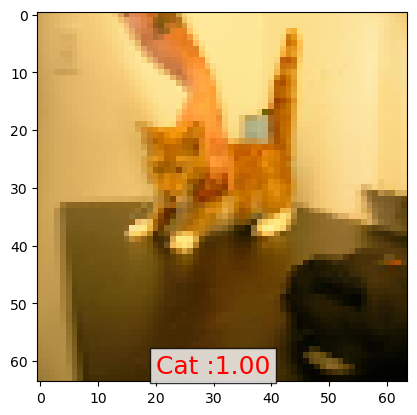

In [21]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('C:\\Users\\BOBBY\\Documents\\AICTE Intern\\dogsvscats\\cats\\0.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()


In [22]:

import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats\0.jpg,0.00000,0,0
1,cats\1.jpg,0.00000,0,0
2,cats\10.jpg,0.00000,0,0
3,cats\1000.jpg,0.00002,0,0
4,cats\10000.jpg,0.00000,0,0
5,cats\10001.jpg,0.00000,0,0
6,cats\10002.jpg,0.00000,0,0
7,cats\10003.jpg,0.00000,0,0
8,cats\10005.jpg,0.00000,0,0
9,cats\10006.jpg,0.00000,0,0


In [25]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 20 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 20 Validation images : 0


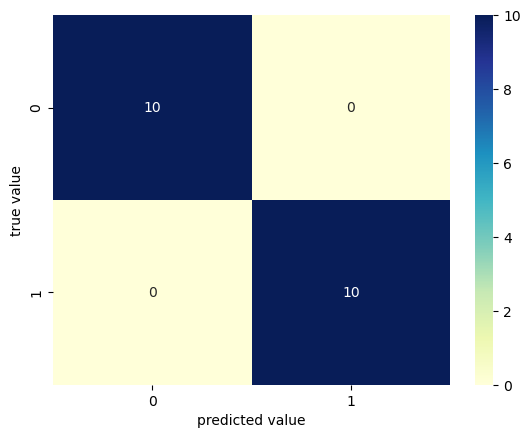

In [26]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

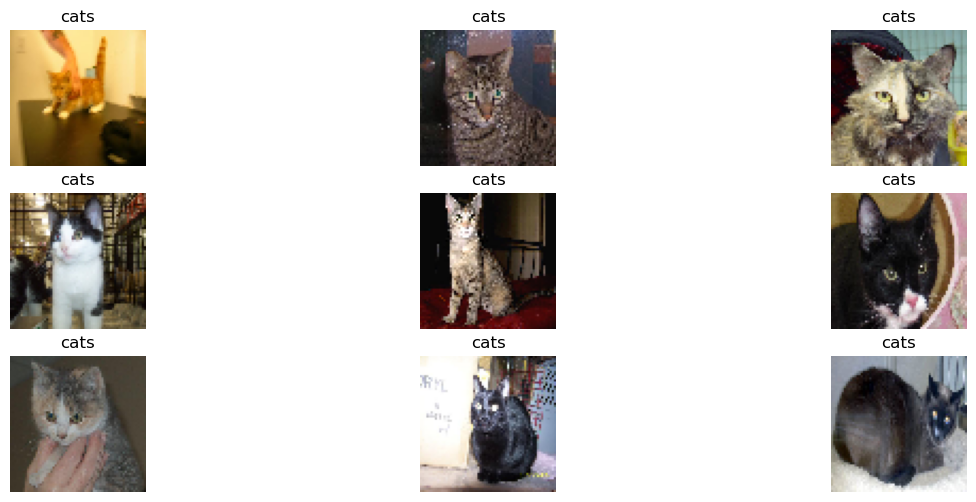

In [33]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

DIRECTORY = r'C:\Users\BOBBY\Documents\AICTE Intern\dogsvscats'
CATEGORIES = ['cats']

# Define the number of columns and rows for subplots
columns = 3
rows = 3

# Create a new figure
fig = plt.figure(figsize=(15, 6))

# Loop through the categories (cats and dogs)
for category in CATEGORIES:
    # Get the path to the current category
    path = os.path.join(DIRECTORY, category)
    
    # Get a list of image filenames in the current category
    filenames = os.listdir(path)
    
    # Ensure that the total number of subplots does not exceed the length of the filenames
    total_plots = min(columns * rows, len(filenames))
    
    # Loop through the valid filenames and plot the images
    for i in range(total_plots):
        # Load and display the current image
        img_path = os.path.join(path, filenames[i])
        img = image.load_img(img_path, target_size=(64, 64))
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.title(category)  # Set title as category
        plt.axis('off')  # Turn off axis labels

plt.show()


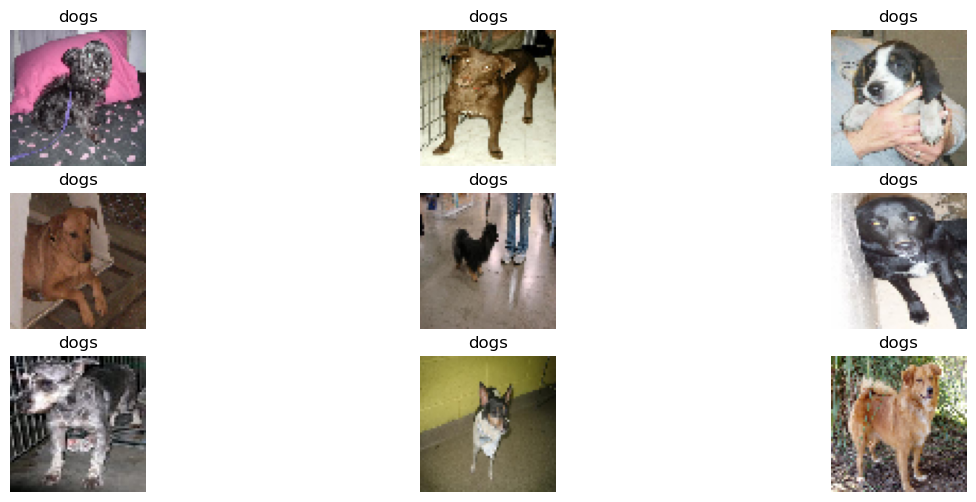

In [34]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

DIRECTORY = r'C:\Users\BOBBY\Documents\AICTE Intern\dogsvscats'
CATEGORIES = ['dogs']

# Define the number of columns and rows for subplots
columns = 3
rows = 3

# Create a new figure
fig = plt.figure(figsize=(15, 6))

# Loop through the categories (cats and dogs)
for category in CATEGORIES:
    # Get the path to the current category
    path = os.path.join(DIRECTORY, category)
    
    # Get a list of image filenames in the current category
    filenames = os.listdir(path)
    
    # Ensure that the total number of subplots does not exceed the length of the filenames
    total_plots = min(columns * rows, len(filenames))
    
    # Loop through the valid filenames and plot the images
    for i in range(total_plots):
        # Load and display the current image
        img_path = os.path.join(path, filenames[i])
        img = image.load_img(img_path, target_size=(64, 64))
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.title(category)  # Set title as category
        plt.axis('off')  # Turn off axis labels

plt.show()


In [35]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

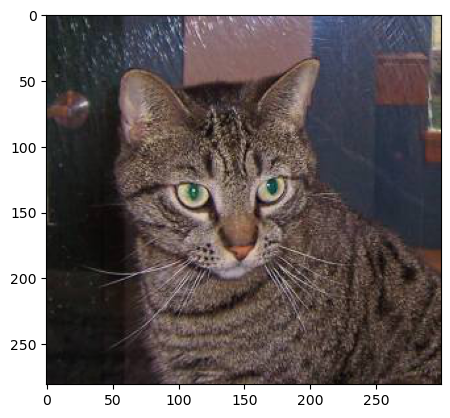

In [36]:
#Input Image for Layer visualization
img1 = image.load_img('C:\\Users\\BOBBY\\Documents\\AICTE Intern\\dogsvscats\\cats\\1.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('C:\\Users\\BOBBY\\Documents\\AICTE Intern\\dogsvscats\\cats\\1.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [37]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'flatten_3', 'dense_6', 'dense_7']


In [38]:
from tensorflow.keras.models import Model
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_6').output)
conv2d_7_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_7').output)

In [39]:
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

1/1 [==============================] - 0s 47ms/step
First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


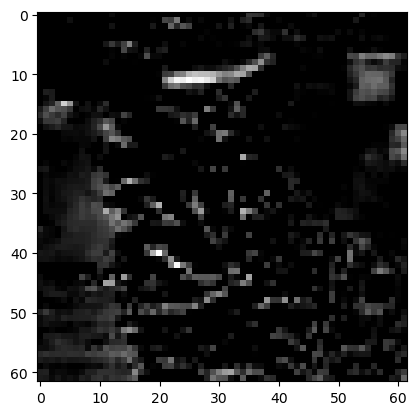

In [40]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

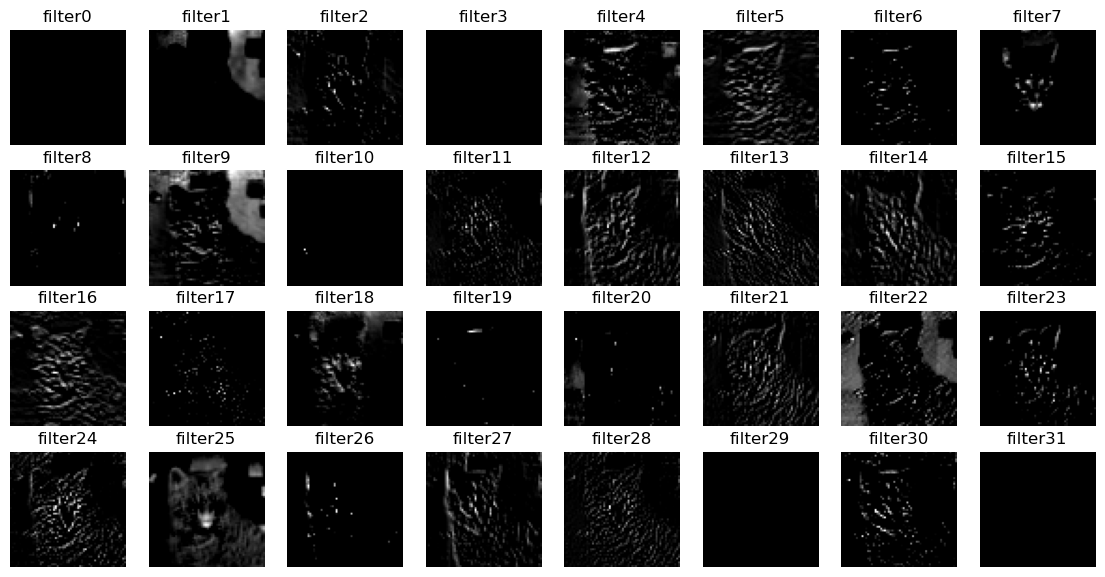

In [41]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

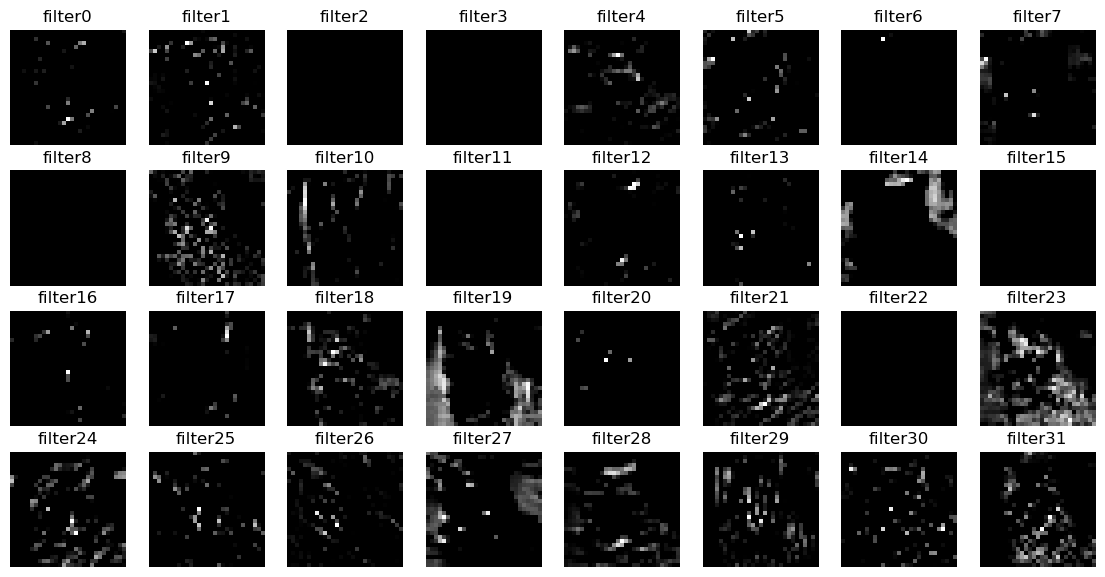

In [42]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

In [53]:
import os
import numpy as np
from keras.preprocessing import image

# Define the directory path and categories
DIRECTORY = r'C:\Users\BOBBY\Documents\AICTE Intern\dogsvscats'
CATEGORIES = ['cats', 'dogs']

# Load images and labels
data = []
labels = []

# Loop through the categories
for category in CATEGORIES:
    # Get the path to the current category
    path = os.path.join(DIRECTORY, category)
    # Get a list of image filenames in the current category
    filenames = os.listdir(path)
    # Load and preprocess images
    for filename in filenames:
        img_path = os.path.join(path, filename)
        img = image.load_img(img_path, target_size=(64, 64))
        img = image.img_to_array(img)
        img = img / 255.0  # Normalize the image
        data.append(img)
        # Assign label based on category
        if category == 'cats':
            labels.append(0)  # Assign label 0 for cats
        else:
            labels.append(1)  # Assign label 1 for dogs

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Evaluate the model
accuracy = classifier.evaluate(data, labels)[1]  # Assuming your model's compile method includes accuracy as a metric

print("Model accuracy:", accuracy)


1/1 [==============================] - 0s 41ms/step - loss: 1.4578e-05 - accuracy: 1.0000
Model accuracy: 1.0
